# Macroeconomic indicators
Economic charting with `ggplot2` in R

In [1]:
install.packages("gridExtra")


The downloaded binary packages are in
	/var/folders/k8/m_cj3fd55_gfbq5cbxf64yg80000gn/T//RtmpH2MQjM/downloaded_packages


In [2]:
# Load necessary libraries
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(gridExtra))

In [3]:
# Set plot dimensions to 3.9*2 x 3.2 inches
options(repr.plot.width = 3.9, repr.plot.height = 3.2)  # in inches

I will be plotting data from the [Consumer Price Index for All Urban Consumers](https://fred.stlouisfed.org/graph/?g=1wmdD) and the [Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE) from FRED via the `quantmod` library.

In [4]:
# Get data from FRED using quantmod
suppressPackageStartupMessages(library(quantmod))

# Example: US CPI & UNRATE
getSymbols(c("CPIAUCSL", "UNRATE"), src = "FRED")

[1] "CPIAUCSL" "UNRATE"

The chart below shows the percent change in the CPI from a year ago starting with the Jan. 2000 data point and ending with the latest data point.

In [5]:
UNRATE

           UNRATE
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
1948-06-01    3.6
1948-07-01    3.6
1948-08-01    3.9
1948-09-01    3.8
1948-10-01    3.7
       ...       
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
2025-02-01    4.1
2025-03-01    4.2
2025-04-01    4.2
2025-05-01    4.2
2025-06-01    4.1
2025-07-01    4.2
2025-08-01    4.3

In [6]:
# Convert xts type CPIAUCSL to data frame
df_cpi <- data.frame(date = index(CPIAUCSL), coredata(CPIAUCSL))

# Convert xts type UNRATE to data frame
df_ur <- data.frame(date = index(UNRATE), coredata(UNRATE))

# Calcualte a percent change from a year ago
df_cpi <- df_cpi %>% mutate(pct_chg = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

# Set plot start and end dates
start_date = as.Date("2000-01-01")
end_date = Sys.Date()

# Set the x-axis step size
x_step = "5 years"

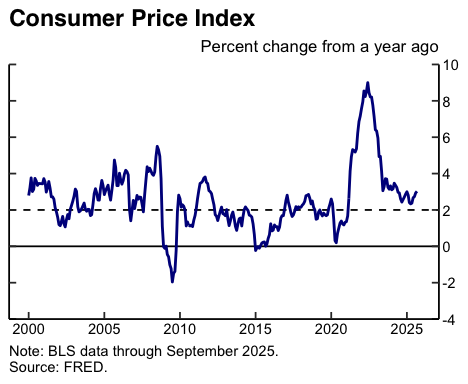

In [7]:
# plot 1a: CPI year-over-year percent change
plot_1a <- df_cpi %>% 
filter(date >= start_date) %>%
na.omit() %>%
ggplot() + 
geom_hline(yintercept = 2, linetype = "dashed", linewidth = 0.5, color = "black") +
geom_hline(yintercept = 0, linetype = "solid", linewidth = 0.5, color = "black") +
geom_line(aes(x = date, y = pct_chg), linewidth=0.8, color="darkblue") +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-4, 10, by = 2),
    limits = c(-4, 10),
    expand = c(0, 0)
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Consumer Price Index",
       subtitle = "Percent change from a year ago",
       caption = paste0("Note: BLS data through ", format(max(df_cpi$date), "%B %Y"), ".\nSource: FRED.")
       ) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0)
    )

plot_1a

# ggsave("plots/plot_cpi.png", plot = plot_1a, width = 3.9, height = 3.2+(0.13*2), units = "in", dpi = 300)

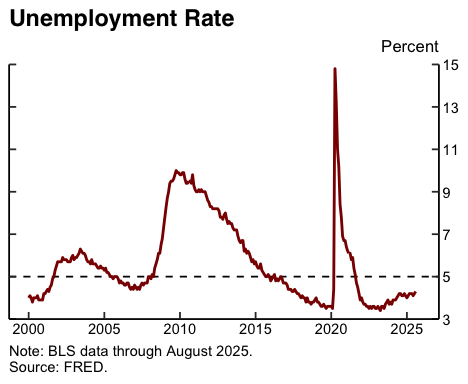

In [8]:
# plot 1b: Unemployment Rate
plot_1b <- df_ur %>% 
filter(date >= start_date) %>%
na.omit() %>%
ggplot() + 
geom_hline(yintercept = 5, linetype = "dashed", linewidth = 0.5, color = "black") +
geom_line(aes(x = date, y = UNRATE), linewidth=0.8, color="darkred") +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(3, 15, by = 2),
    limits = c(3, 15),
    expand = c(0, 0)
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Unemployment Rate",
       subtitle = "Percent",
       caption = paste0("Note: BLS data through ", format(max(df_ur$date), "%B %Y"), ".\nSource: FRED.")
       ) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0)
    )

plot_1b

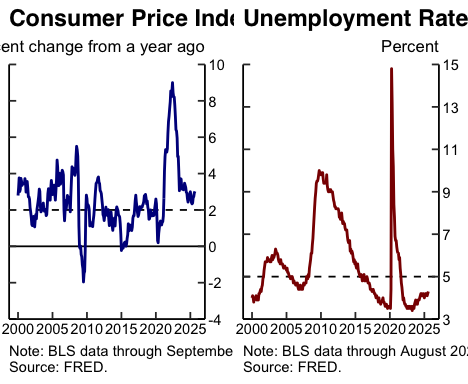

In [ ]:
ggsave(
    "../plots/plot_cpi.png",
    plot = grid.arrange(plot_1a, plot_1b, ncol=2),
    width = 3.9*2,
    height = 3.2+(0.13*2),
    units = "in",
    dpi = 300
    )

The chart below shows the percent change from a year ago in the CPI and the unemployment rate.

The dashed red and blue lines are the "natural rate of unemployment" and the Fed's inflation target, respectively. 

Although the exact figure for the "natural rate of unemployment" is unkown, it usually hovers between four and five percent. 

In this chart, I plotted it at 5%. The inflation target is plotted at 2%.

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


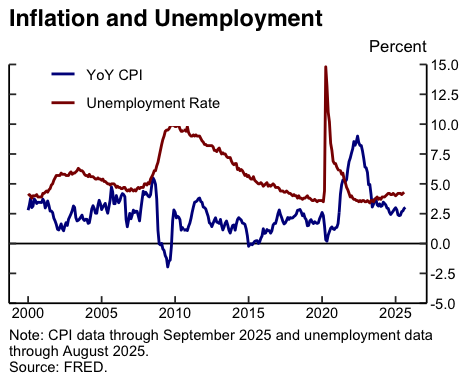

In [ ]:
df <- full_join(
  data.frame(date = index(CPIAUCSL), coredata(CPIAUCSL)),
  data.frame(date = index(UNRATE), coredata(UNRATE)),
  by = "date"
)

df <- df %>% mutate(CPIAUCSL = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

df_long <- df %>% pivot_longer(-date)

# Set plot start and end dates
start_date = as.Date("2000-01-01")
end_date = Sys.Date()

# Set the x-axis step size
x_step = "5 years"

# Make line chart
plot_2 <- df_long %>% 
filter(date >= start_date) %>%
na.omit() %>%
ggplot() + 
geom_hline(yintercept = 0, linetype = "solid", linewidth = 0.5, color = "black") +
# geom_hline(yintercept = 2, linetype = "dashed", linewidth = 0.5, color = "darkblue") +
# geom_hline(yintercept = 5, linetype = "dashed", linewidth = 0.5, color = "darkred") +
geom_line(aes(x = date, y = value, color=name), linewidth=0.8) +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-5, 15, by = 2.5),
    limits = c(-5, 15),
    expand = c(0, 0)
    ) +
    scale_color_manual(
      NULL,
      values = c("CPIAUCSL" = "darkblue", "UNRATE" = "darkred"),
      labels = c("CPIAUCSL" = "YoY CPI", "UNRATE" = "Unemployment Rate")
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Inflation and Unemployment",
       subtitle = "Percent",
       caption = paste0("Note: CPI data through ", format(max(df$date), "%B %Y"), " and unemployment data\nthrough ", format(max(na.omit(df)$date), "%B %Y"), ".\nSource: FRED.")
       ) +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    legend.position = c(0.3, 0.9),
    plot.caption = element_text(hjust = 0)
    )

plot_2

ggsave("../plots/plot_cpi_unrate.png", plot = plot_2, width = 3.9, height = 3.2+(0.13*3), units = "in", dpi = 300)

# Phillips curve
Check assumptions of Phillips Curve.


Call:
lm(formula = CPIAUCSL ~ UNRATE, data = df_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0545 -0.9560 -0.2311  0.5681  5.6238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7665     0.2752   17.32  < 2e-16 ***
UNRATE       -0.3864     0.0460   -8.40  1.7e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.572 on 306 degrees of freedom
Multiple R-squared:  0.1874,	Adjusted R-squared:  0.1847 
F-statistic: 70.56 on 1 and 306 DF,  p-value: 1.696e-15


(Intercept) 
   4.766532 
   UNRATE 
-0.386398 


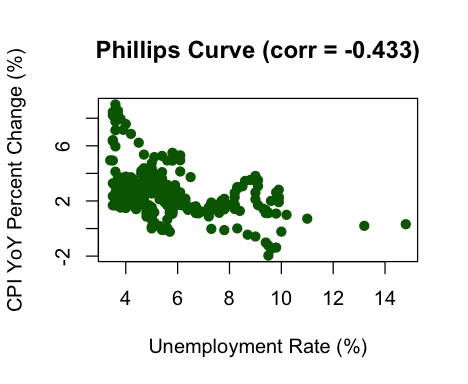

In [11]:
# 2000 - present of scatter plot
df_full <- df %>% na.omit() %>% filter(date >= as.Date("2000-01-01")) #& date <= as.Date("2014-08-01")

# code to correlate the two series
corr=cor(df_full$CPIAUCSL, df_full$UNRATE) %>% round(3)

# code to plot scatter plot
plot(df_full$UNRATE, df_full$CPIAUCSL,
     xlab = "Unemployment Rate (%)",
     ylab = "CPI YoY Percent Change (%)",
     main = paste0("Phillips Curve (corr = ", corr, ")"),
     pch = 19,
     col = "darkgreen"
     )

# lm
lm <-lm(CPIAUCSL ~ UNRATE, data = df_full)
summary(lm)
a=print(coef(lm)[1]) %>% round(2) 
b=print(coef(lm)[2]) %>% round(2)


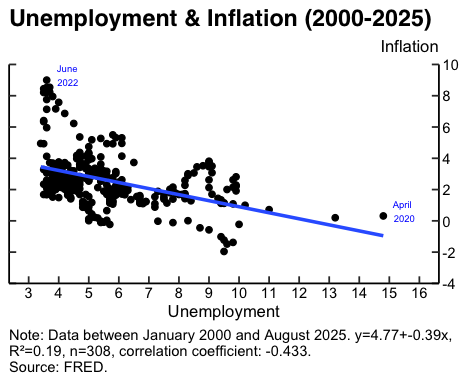

In [ ]:
# plot the two series
phillps_curve <- df_full %>% 
ggplot(aes(x = UNRATE, y = CPIAUCSL), label = date) + 
geom_point() + 
geom_text(
    aes(label=ifelse(UNRATE>14 | CPIAUCSL>8.6,as.character(format(date, "%B\n%Y")),'')),
    hjust=-0.5, 
    vjust=0.25,
    size=2,
    color="blue"
    ) +
stat_smooth(
    method = "lm", 
    formula = y ~ x, 
    se = FALSE,
    geom = "smooth"
    ) + 
scale_x_continuous(
    breaks = seq(3, 16, by = 1),
    limits = c(3, 16)
) +
scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-4, 10, by = 2),
    limits = c(-4, 10),
    expand = c(0, 0)
) +
xlab("Unemployment") + ylab(NULL) +
labs(
    title = "Unemployment & Inflation (2000-2025)", #Unemployment v. Inflation
    subtitle = "Inflation",
    caption = paste0(
        "Note: Data between January 2000 and ", format(max(df_full$date), "%B %Y"),". y=", a, "+", b, "x,",
        "\nR²=", round(summary(lm)$r.squared, 2), ", n=", nrow(df_full), ", correlation coefficient: ", corr, ".",
        "\nSource: FRED.")
    ) +
theme_classic() +
theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0),
    legend.position = c(0.3, 0.9),
    axis.title.x = element_text(size=10)
)

phillps_curve

ggsave("../plots/plot_phillips_curve.png", plot = phillps_curve, width = 3.9, height = 3.2+(0.13*4), units = "in", dpi = 300)


Call:
lm(formula = CPIAUCSL ~ UNRATE, data = df_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8577 -2.1187 -0.7987  1.1082  8.7962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2497     0.6605   4.920 1.44e-06 ***
UNRATE        0.4042     0.1032   3.918 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.101 on 298 degrees of freedom
Multiple R-squared:  0.049,	Adjusted R-squared:  0.0458 
F-statistic: 15.35 on 1 and 298 DF,  p-value: 0.0001107


(Intercept) 
     3.2497 
   UNRATE 
0.4041796 


,date,CPIAUCSL,UNRATE
,<date>,<dbl>,<dbl>
1,1965-01-01,1.098901,4.9
2,1965-02-01,1.197024,5.1
3,1965-03-01,1.195863,4.7
4,1965-04-01,1.389338,4.8
5,1965-05-01,1.613944,4.6
6,1965-06-01,1.934860,4.6


[1] 10.8

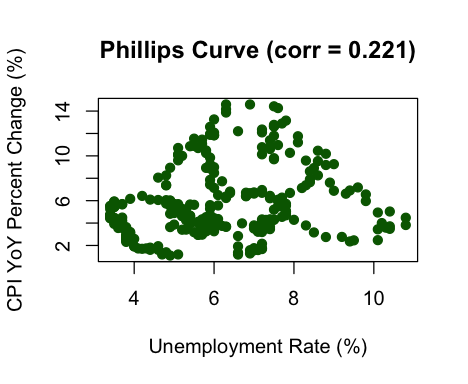

In [13]:
# stagflation model
df_full <- df %>% na.omit() %>% filter(date >= as.Date("1965-01-01") & date <= as.Date("1989-12-31")) 

# code to correlate the two series
corr=cor(df_full$CPIAUCSL, df_full$UNRATE) %>% round(3)

# code to plot scatter plot
plot(df_full$UNRATE, df_full$CPIAUCSL,
     xlab = "Unemployment Rate (%)",
     ylab = "CPI YoY Percent Change (%)",
     main = paste0("Phillips Curve (corr = ", corr, ")"),
     pch = 19,
     col = "darkgreen"
     )

# lm
lm <-lm(CPIAUCSL ~ UNRATE, data = df_full)
summary(lm)
a=print(coef(lm)[1]) %>% round(2) 
b=print(coef(lm)[2]) %>% round(2)

head(df_full)
max(df_full$UNRATE)

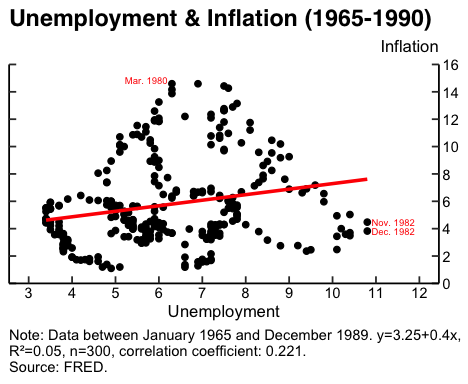

In [ ]:
phillps_curve_stag <- df_full %>% 
ggplot(aes(x = UNRATE, y = CPIAUCSL), label = date) + 
geom_point() + 
geom_text(
    aes(label=ifelse(CPIAUCSL>14.59,as.character(format(date, "%b. %Y")),'')),
    hjust=1.1, 
    vjust=0,
    size=2,
    color="red"
    ) +
geom_text(
    aes(label=ifelse(UNRATE>10.79,as.character(format(date, "%b. %Y")),'')),
    hjust=-0.1, 
    vjust=0.5,
    size=2,
    color="red"
    ) +
stat_smooth(
    method = "lm", 
    formula = y ~ x, 
    se = FALSE,
    geom = "smooth",
    color = "red"
    ) + 
scale_x_continuous(
    breaks = seq(3, 12, by = 1),
    limits = c(3, 12)
) +
scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(0, 16, by = 2),
    limits = c(0, 16),
    expand = c(0, 0)
) +
xlab("Unemployment") + ylab(NULL) +
labs(
    title = "Unemployment & Inflation (1965-1990)", #Unemployment v. Inflation
    subtitle = "Inflation",
    caption = paste0(
        "Note: Data between January 1965 and ", format(max(df_full$date), "%B %Y"),". y=", a, "+", b, "x,",
        "\nR²=", round(summary(lm)$r.squared, 2), ", n=", nrow(df_full), ", correlation coefficient: ", corr, ".",
        "\nSource: FRED.")
    ) +
theme_classic() +
theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0),
    legend.position = c(0.3, 0.9),
    axis.title.x = element_text(size=10)
)

phillps_curve_stag

ggsave("../plots/plot_phillips_curve_stag.png", plot = phillps_curve_stag, width = 3.9, height = 3.2+(0.13*4), units = "in", dpi = 300)

Check calendar year phillips curve over last 4 complete years

`geom_smooth()` using formula = 'y ~ x'


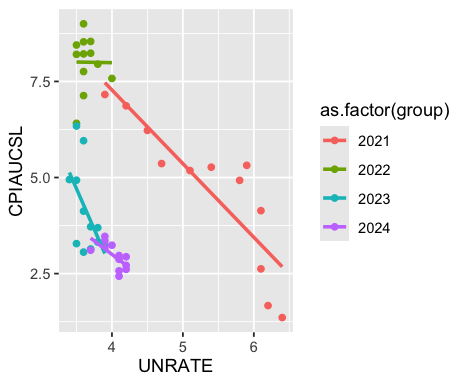

In [15]:
seg <- df %>% 
    na.omit() %>%
    # filter(year(date) %in% c(1989:2004)) %>%
    filter(year(date) %in% c(2021:2024)) %>%
    mutate(group = year(date), group2 = 2 * round(year(date)/2))

# head(seg, 50)

short_phillips_curve <- seg %>% 
    ggplot(aes(x=UNRATE, y=CPIAUCSL, color=as.factor(group))) +
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE)

short_phillips_curve

Check year long phillips curve for stagflation period

`geom_smooth()` using formula = 'y ~ x'


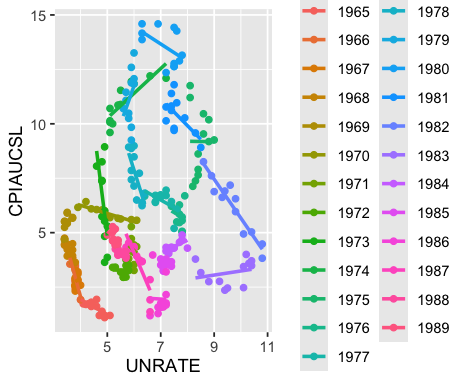

In [16]:
seg <- df %>% 
    na.omit() %>%
    filter(year(date) %in% c(1965:1989)) %>%
    mutate(group = year(date), group2 = 2 * round(year(date)/2))

# head(seg, 50)

short_phillips_curve <- seg %>% 
    ggplot(aes(x=UNRATE, y=CPIAUCSL, color=as.factor(group))) +
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE)

short_phillips_curve

Manually segment stagflation year into phillips curves of 2-5 year segments

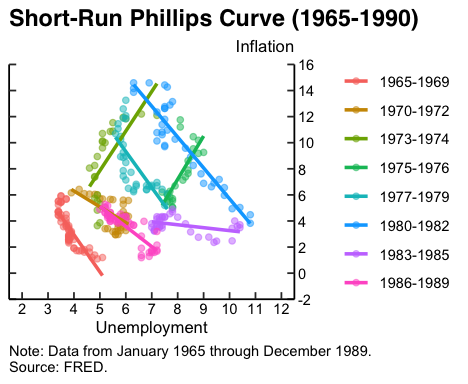

In [ ]:
seg <- df %>% 
    na.omit() %>%
    filter(year(date) %in% c(1965:1989)) %>%
    mutate(group = year(date), group2 = case_when(
        year(date) %in% 1965:1969 ~ "1965-1969", # FIVE YEAR
        year(date) %in% 1970:1972 ~ "1970-1972",
        year(date) %in% 1973:1974 ~ "1973-1974", # TWO YEAR
        year(date) %in% 1975:1976 ~ "1975-1976", # TWO YEAR
        year(date) %in% 1977:1979 ~ "1977-1979",
        year(date) %in% 1980:1982 ~ "1980-1982",
        year(date) %in% 1983:1985 ~ "1983-1985",
        year(date) %in% 1986:1989 ~ "1986-1989"  # FOUR YEAR
    ))

# head(seg, 50)

short_phillips_curve <- seg %>% 
ggplot(aes(x=UNRATE, y=CPIAUCSL, color=as.factor(group2))) +
geom_point(alpha=0.5) + 
geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
scale_x_continuous(
    breaks = seq(2, 12, by = 1),
    limits = c(2, 12)
) +
scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-2, 16, by = 2),
    limits = c(-2, 16),
    expand = c(0, 0)
) +
xlab("Unemployment") + ylab(NULL) +
labs(
    title = "Short-Run Phillips Curve (1965-1990)", #Unemployment v. Inflation
    subtitle = "Inflation",
    caption = paste0(
        "Note: Data from January 1965 through ", format(max(df_full$date), "%B %Y."),
        "\nSource: FRED.")
    ) +
theme_classic() +
theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0),
    legend.position = "right",
    axis.title.x = element_text(size=10),
    legend.title = element_blank()
)

short_phillips_curve

ggsave("../plots/short_phillips_curve.png", plot = short_phillips_curve, width = 3.9*1.25, height = 3.2+(0.13*2), units = "in", dpi = 300)